In [1]:
%matplotlib inline

In [2]:
import datetime
import os

from openfisca_core import decompositions, periods
from openfisca_france import FranceTaxBenefitSystem
from openfisca_france.visualizations import charts, dataframes
from openfisca_france.tests.reforms.test_parametric_reform import ir_100_tranche_1

In [3]:
tax_benefit_system = FranceTaxBenefitSystem()

In [4]:
def create_simulation(year = 2014, bareme = False):

    reform = ir_100_tranche_1(tax_benefit_system)
    parent1 = dict(
        date_naissance = datetime.date(year - 40, 1, 1),
        salaire_de_base = 10000 if bareme is False else None,
        categorie_salarie = 0,
        )
#    parent2 = dict(
#        date_naissance = datetime.date(year - 40, 1, 1),
#        salaire_de_base = 0,
#        )
    # Adding a husband/wife on the same tax sheet (foyer)
    menage = dict(
        loyer = 1000,
        statut_occupation_logement = 4,
        )
    axes = [
        dict(
            count = 200,
            name = 'salaire_de_base',
            max = 300000,
            min = 0,
            ),
        ]
    scenario = reform.new_scenario().init_single_entity(
        axes = axes if bareme else None,
        menage = menage,
        parent1 = parent1,
        # parent2 = parent2,
        period = periods.period('year', year),
        )
    reference_simulation = scenario.new_simulation(debug = True, reference = True)
    reform_simulation = scenario.new_simulation(debug = True)
    return reform_simulation, reference_simulation

## Charts

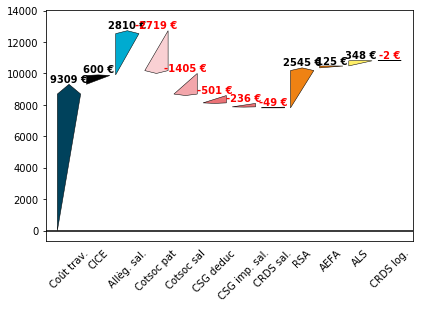

In [5]:
simulation, _ = create_simulation(bareme = False)
charts.draw_waterfall(simulation = simulation)

In [6]:
reform_simulation, reference_simulation = create_simulation(bareme = True)

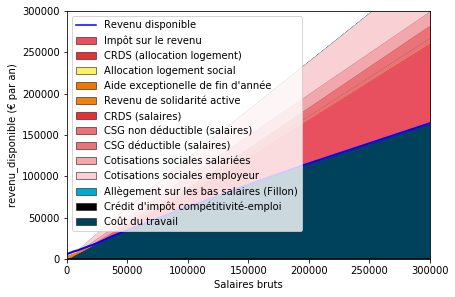

In [7]:
charts.draw_bareme(
    simulation = reform_simulation,
    x_axis = 'salaire_brut',  # instead of salaire_de_base
    visible_lines = ['revenu_disponible'],
    )

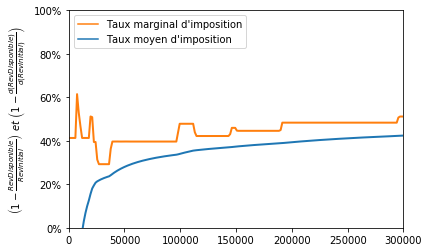

In [8]:
charts.draw_rates(
    simulation = reform_simulation,
    x_axis = 'salaire_de_base',
    y_axis = 'revenu_disponible',
    reference_simulation = reference_simulation,
    )

In [9]:
def create_simulation2(year = 2014, bareme = False):
    parent1 = dict(
        date_naissance = datetime.date(year - 40, 1, 1),
        salaire_de_base = 4000 if bareme is False else None,
        )
    parent2 = dict(
        date_naissance = datetime.date(year - 40, 1, 1),
        salaire_de_base = 1000,
        )
    # Adding a husband/wife on the same tax sheet (foyer)
    menage = dict(
        loyer = 1000,
        statut_occupation_logement = 4,
        )
    axes = [
        dict(
            count = 100,
            name = 'salaire_de_base',
            max = 30000,
            min = 0,
            ),
        ]
    scenario_1p = tax_benefit_system.new_scenario().init_single_entity(
        axes = axes if bareme else None,
        menage = menage,
        parent1 = parent1,
        period = periods.period('year', year),
        )
    simulation_1p = scenario_1p.new_simulation(debug = True)

    scenario_2p = tax_benefit_system.new_scenario().init_single_entity(
        axes = axes if bareme else None,
        menage = menage,
        parent1 = parent1,
        parent2 = parent2,
        period = periods.period('year', year),
        )
    simulation_2p = scenario_2p.new_simulation(debug = True)

    return simulation_1p, simulation_2p

In [10]:
simulation_1p, simulation_2p = create_simulation2(bareme = True)

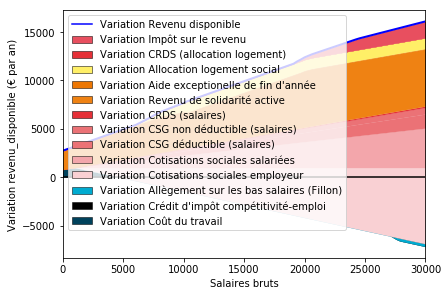

In [11]:
charts.draw_bareme(
    simulation = simulation_2p,
    x_axis = 'salaire_brut',
    reference_simulation = simulation_1p,
    visible_lines = ['revenu_disponible'],
    )

## Data Frames

In [12]:
# basic
dataframes.from_decomposition_json(
    reform_simulation,
    decomposition_json = None,
    reference_simulation = reference_simulation,
    )

,label,name,value_0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,...,value_190,value_191,value_192,value_193,value_194,value_195,value_196,value_197,value_198,value_199
0,Coût du travail,cout_du_travail,0,1403.43,2806.8,4210.11,5613.52,7016.92,8420.32,9823.63,...,340546,342307,344067,345828,347589,349349,351110,352871,354631,356392
1,Crédit d'impôt compétitivité-emploi,credit_impot_competitivite_emploi,0,90.4523,180.905,271.357,361.809,452.261,542.714,633.166,...,0,0,0,0,0,0,0,0,0,0
2,Aide à l'embauche d'un premier salarié,aide_premier_salarie,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aide PME à l'embauche d'un salarié,aide_embauche_pme,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Taxe exceptionnelle sur les hauts revenus,tehr,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Salaires super bruts,salaire_super_brut,0,1493.88,2987.71,4481.47,5975.33,7469.18,8963.03,10456.8,...,340546,342307,344067,345828,347589,349349,351110,352871,354631,356392
6,Allègement sur les bas salaires (Fillon),allegement_fillon,0,423.618,847.236,1270.85,1694.47,2118.09,2541.71,2965.33,...,0,0,0,0,0,0,0,0,0,0
7,Salaires super bruts hors allègements,salaire_super_brut_hors_allegements,0,1917.5,3834.94,5752.32,7669.8,9587.27,11504.7,13422.1,...,340546,342307,344067,345828,347589,349349,351110,352871,354631,356392
8,Cotisations sociales employeur,cotisations_employeur,0,-409.963,-819.866,-1229.71,-1639.65,-2049.58,-2459.52,-2869.36,...,-54113.8,-54366.9,-54620.1,-54873.2,-55126.4,-55379.5,-55632.7,-55885.9,-56139,-56392.1
9,Salaires bruts,salaire_brut,0,1507.54,3015.08,4522.61,6030.15,7537.69,9045.23,10552.8,...,286432,287940,289447,290955,292462,293970,295477,296985,298492,300000


In [13]:
# bareme
dataframes.from_decomposition_json(
    reform_simulation,
    decomposition_json = None,
    reference_simulation = reference_simulation,
    )

,label,name,value_0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,...,value_190,value_191,value_192,value_193,value_194,value_195,value_196,value_197,value_198,value_199
0,Coût du travail,cout_du_travail,0,1403.43,2806.8,4210.11,5613.52,7016.92,8420.32,9823.63,...,340546,342307,344067,345828,347589,349349,351110,352871,354631,356392
1,Crédit d'impôt compétitivité-emploi,credit_impot_competitivite_emploi,0,90.4523,180.905,271.357,361.809,452.261,542.714,633.166,...,0,0,0,0,0,0,0,0,0,0
2,Aide à l'embauche d'un premier salarié,aide_premier_salarie,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aide PME à l'embauche d'un salarié,aide_embauche_pme,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Taxe exceptionnelle sur les hauts revenus,tehr,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Salaires super bruts,salaire_super_brut,0,1493.88,2987.71,4481.47,5975.33,7469.18,8963.03,10456.8,...,340546,342307,344067,345828,347589,349349,351110,352871,354631,356392
6,Allègement sur les bas salaires (Fillon),allegement_fillon,0,423.618,847.236,1270.85,1694.47,2118.09,2541.71,2965.33,...,0,0,0,0,0,0,0,0,0,0
7,Salaires super bruts hors allègements,salaire_super_brut_hors_allegements,0,1917.5,3834.94,5752.32,7669.8,9587.27,11504.7,13422.1,...,340546,342307,344067,345828,347589,349349,351110,352871,354631,356392
8,Cotisations sociales employeur,cotisations_employeur,0,-409.963,-819.866,-1229.71,-1639.65,-2049.58,-2459.52,-2869.36,...,-54113.8,-54366.9,-54620.1,-54873.2,-55126.4,-55379.5,-55632.7,-55885.9,-56139,-56392.1
9,Salaires bruts,salaire_brut,0,1507.54,3015.08,4522.61,6030.15,7537.69,9045.23,10552.8,...,286432,287940,289447,290955,292462,293970,295477,296985,298492,300000


In [14]:
# remove_null
dataframes.from_decomposition_json(
    reform_simulation,
    decomposition_json = None,
    reference_simulation = reference_simulation,
    remove_null = True,
    )


,label,name,value_0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,...,value_190,value_191,value_192,value_193,value_194,value_195,value_196,value_197,value_198,value_199
0,Coût du travail,cout_du_travail,0,1403.43,2806.8,4210.11,5613.52,7016.92,8420.32,9823.63,...,340546,342307,344067,345828,347589,349349,351110,352871,354631,356392
1,Crédit d'impôt compétitivité-emploi,credit_impot_competitivite_emploi,0,90.4523,180.905,271.357,361.809,452.261,542.714,633.166,...,0,0,0,0,0,0,0,0,0,0
2,Salaires super bruts,salaire_super_brut,0,1493.88,2987.71,4481.47,5975.33,7469.18,8963.03,10456.8,...,340546,342307,344067,345828,347589,349349,351110,352871,354631,356392
3,Allègement sur les bas salaires (Fillon),allegement_fillon,0,423.618,847.236,1270.85,1694.47,2118.09,2541.71,2965.33,...,0,0,0,0,0,0,0,0,0,0
4,Salaires super bruts hors allègements,salaire_super_brut_hors_allegements,0,1917.5,3834.94,5752.32,7669.8,9587.27,11504.7,13422.1,...,340546,342307,344067,345828,347589,349349,351110,352871,354631,356392
5,Cotisations sociales employeur,cotisations_employeur,0,-409.963,-819.866,-1229.71,-1639.65,-2049.58,-2459.52,-2869.36,...,-54113.8,-54366.9,-54620.1,-54873.2,-55126.4,-55379.5,-55632.7,-55885.9,-56139,-56392.1
6,Salaires bruts,salaire_brut,0,1507.54,3015.08,4522.61,6030.15,7537.69,9045.23,10552.8,...,286432,287940,289447,290955,292462,293970,295477,296985,298492,300000
7,Cotisations sociales salariées,cotisations_salariales,0,-211.81,-423.62,-635.43,-847.24,-1059.03,-1270.86,-1482.67,...,-17109.3,-17124.4,-17139.5,-17154.5,-17169.6,-17184.7,-17199.8,-17214.8,-17229.9,-17245
8,CSG déductible (salaires),csg_deductible_salaire,0,-75.538,-151.076,-226.614,-302.158,-377.696,-453.234,-528.772,...,-14474.7,-14551.6,-14628.5,-14705.4,-14782.3,-14859.2,-14936,-15012.9,-15089.8,-15166.7
9,Salaires imposables,salaire_imposable,0,1220.19,2440.38,3660.57,4880.75,6100.96,7321.13,8541.32,...,254848,256264,257679,259095,260510,261926,263342,264757,266173,267588


In [15]:
xml_file_path = os.path.join(
    os.path.dirname(tax_benefit_system.decomposition_file_path),
    "fiche_de_paie_decomposition.xml"
    )
decomposition_json = decompositions.get_decomposition_json(tax_benefit_system, xml_file_path)

In [17]:
# # Fiche de paie
# dataframes.from_decomposition_json(
#     simulation,
#     decomposition_json = decomposition_json,
#     remove_null = True,
#     )

In [19]:
# # Fiche de paie barème
# dataframes.from_decomposition_json(
#     reference_simulation,
#     decomposition_json = decomposition_json,
#     remove_null = True,
#     )